## KNN with confusion matrix(digit)



In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits


In [9]:
digits=load_digits()
dir(digits)
digits.feature

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
df1= pd.DataFrame(digits.data,columns= digits['feature_names'])

In [16]:
df1['traget']= digits.target

In [17]:
df1

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,traget
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [24]:
x=df1.iloc[:,0:64]
y=df1.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.2)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=15)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [34]:
kn.score(x_test,y_test)

0.9611111111111111

In [44]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(KNeighborsClassifier(n_neighbors=5),x_test,y_test)
score2 = cross_val_score(KNeighborsClassifier(n_neighbors=10),x_test,y_test)
score3 = cross_val_score(KNeighborsClassifier(n_neighbors=15),x_test,y_test)

In [46]:
list=[np.mean(score1),
np.mean(score2),
np.mean(score3),]

In [47]:
list

[0.95, 0.9333333333333333, 0.913888888888889]

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,kn.predict(x_test))

In [49]:
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  3,  1,  1,  0,  0,  0,  1, 30,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]], dtype=int64)

Text(42.0, 0.5, 'Truth')

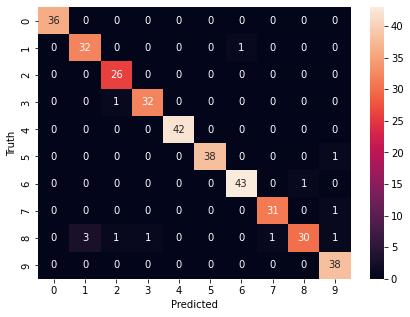

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.model_selection import GridSearchCV
